# Data Visualization - Bivariate

In [1]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

print('¡Librerías importadas con éxito!')

¡Librerías importadas con éxito!


In [2]:
#Abrimos el archivo con los datos de Training Limpios
dfReducido = pd.read_csv('train_clean.csv')
dfReducido.head()

,id,name,release_date,artists,total_tracks,t_name0,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,t_sig0,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,7.0,1.0,192284.000,0.537,0.459,0.049,0.490,0.000,0.091,0.779,133.243,3.333,51.0
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,10.0,0.0,195199.667,0.779,0.658,0.202,0.109,0.000,0.114,0.413,139.028,4.000,67.0
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,8.0,0.0,154768.333,0.555,0.487,0.273,0.241,0.029,0.287,0.521,122.269,4.000,81.0
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,8.0,1.0,203866.333,0.628,0.585,0.027,0.333,0.000,0.203,0.556,114.783,4.000,53.0
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,9.0,1.0,140693.000,0.638,0.302,0.072,0.711,0.000,0.271,0.533,116.460,4.000,70.0


In [3]:
#Para las visualizaciones, cambiamos los valores numericos de Key y Mode a sus categorias respectivas


dfReducido['t_key0'].replace([0,1,2,3,4,5,6,7,8,9,10,11],['C','C♯','D','E♭','E','F','F♯','G','G♯','A','B♭','B'],inplace=True)
dfReducido['t_mode0'].replace([0,1],['menor','mayor'],inplace=True)

#### Tabla de Correlacion

Se analiza la correlacion de las variables numericas continuas (o sea dejando de lado Key y Mode) y la popularidad (variable Target)

Text(0.5, 1.0, 'Heatmap de correlaciones Variables Numericas')

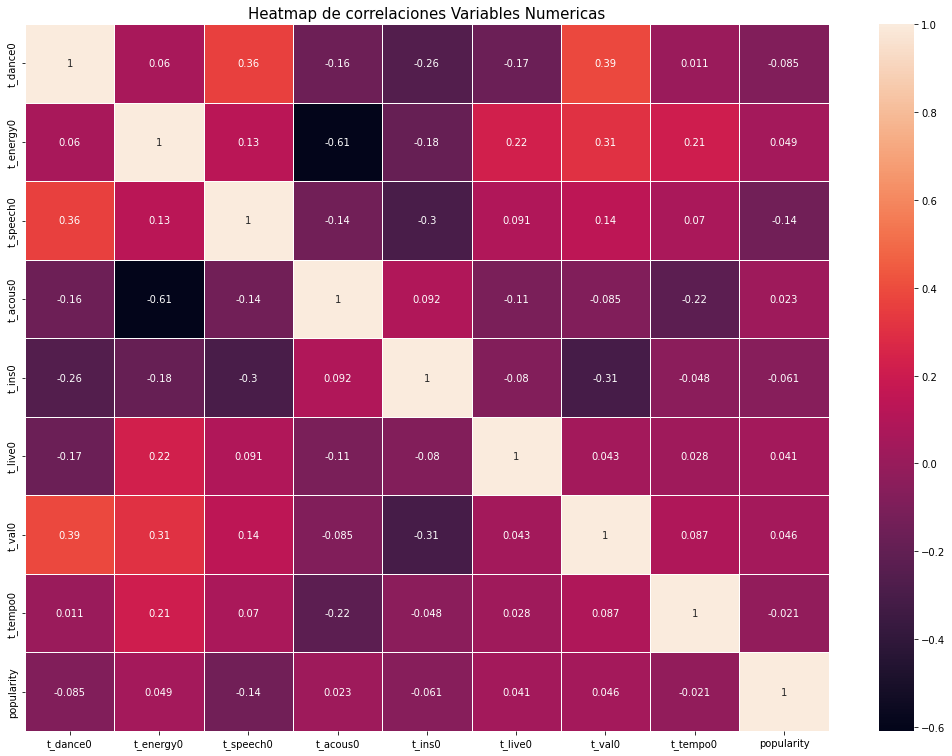

In [4]:
#Correlacion entre Atributos y Popularidad

correlacion = dfReducido[['t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0','t_tempo0','popularity']].corr(method='spearman')


fig, ax = plt.subplots(figsize=(18,13))         
sns.heatmap(correlacion, annot = True, linewidths=.5, ax=ax)
ax.set_title('Heatmap de correlaciones Variables Numericas',fontsize = 15)

**Observaciones:**

- No se encuentran grandes correlaciones entre la variable target Popularidad y las variables descriptivas
- La variable de Valencia (que describe la positividad de la cancion) parece correlacionarse con las variables Energy y Dancebility. Esto tiene sentido ya que canciones mas 'alegres' suelen ser bailables y energeticas, mientras que canciones 'tristes' son menos energetica y bailables
- Se muestra una correlacion negativa entre Energia y Acustico.

#### Correlacion entre Popularity y Key-Mode

In [5]:
groupKey = dfReducido.groupby('t_key0')['popularity','t_val0'].mean()
groupKey

/var/folders/95/89zxcppd3hd7gjlsj6qjx4cm0000gn/T/ipykernel_71598/3306435672.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupKey = dfReducido.groupby('t_key0')['popularity','t_val0'].mean()


,popularity,t_val0
t_key0,,
A,31.261019,0.481385
B,30.759256,0.490185
B♭,30.121511,0.484543
C,31.308104,0.473605
C♯,29.565628,0.455703
D,31.506630,0.452510
E,32.010989,0.454349
E♭,32.289665,0.463620
F,31.180320,0.480179


Text(0.5, 1.0, 'Distribucion de Popularidad segun Key')

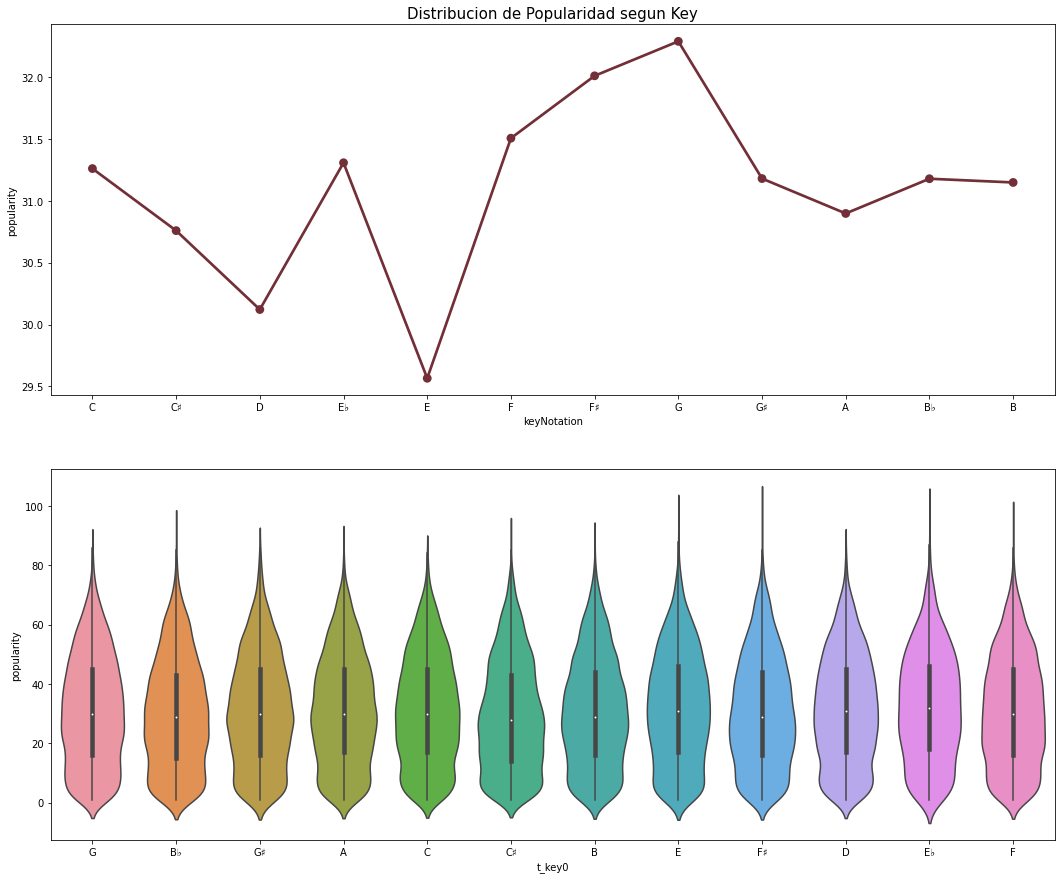

In [6]:
groupKey['keyNotation'] = ['C','C♯','D','E♭','E','F','F♯','G','G♯','A','B♭','B']
fig,axes = plt.subplots(2,1,figsize=(18,15))

ax = sns.pointplot(x = 'keyNotation', y = 'popularity', data=groupKey, color = '#722f37',ax = axes[0])


ax2 = sns.violinplot(x='t_key0',y='popularity',data = dfReducido,ax = axes[1])

ax.set_title('Distribucion de Popularidad segun Key',fontsize = 15)

**Observaciones**

- Viendo los promedios de popularidad segun la Key de la cancion, no sobresalta nungun valor en particular (todas las keys presentan valores similares de popularidad en promedio).
- Lo mismo al ver el grafico de Violin. Las distribuciones de los valores de popularidad son relativamente similares entre las diferentes Keys

/var/folders/95/89zxcppd3hd7gjlsj6qjx4cm0000gn/T/ipykernel_71598/3221637072.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupMode = dfReducido.groupby('t_mode0')['popularity','t_val0'].mean()


         popularity    t_val0   Mode
t_mode0                             
mayor     31.788366  0.473651  Menor
menor     29.848859  0.474825  Mayor


[Text(0.5, 1.0, 'Box plot Valencia respecto a Mode')]

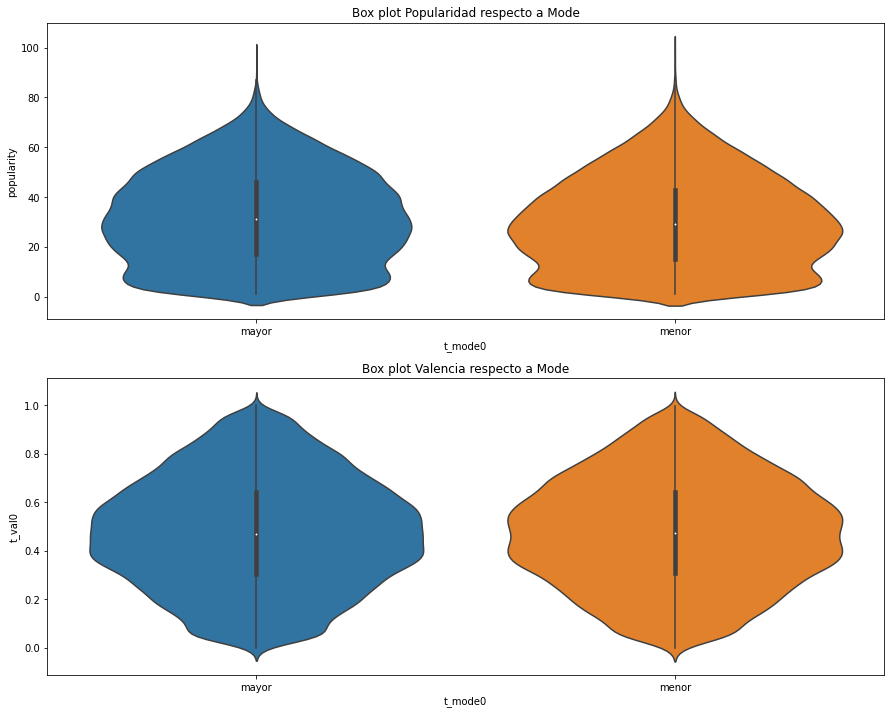

In [7]:
#Haciendo el mismo analisis pero para la variable Mode

groupMode = dfReducido.groupby('t_mode0')['popularity','t_val0'].mean()
groupMode['Mode'] = ['Menor','Mayor']
print(groupMode)


fig1, axes1= plt.subplots(2,1,figsize=(15,12))

sns.violinplot(x='t_mode0',y='popularity',data = dfReducido,ax = axes1[0]).set(title = 'Box plot Popularidad respecto a Mode')
sns.violinplot(x='t_mode0',y='t_val0',data = dfReducido,ax = axes1[1]).set(title = 'Box plot Valencia respecto a Mode')
 

**Observaciones**

- Dado el significado de la variable Modo en una cancion, se esperaba ver una diferencia al agrupar la Valencia segun el Modo. Como se ve en la tabla, el promedio de Valencia es casi el mismo para ambos posibles valores de Modo